In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

In [7]:
dataset = pd.read_csv('Heart_Disease_Prediction.csv')
dataset.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3e9c720d0>,
      dtype=object)

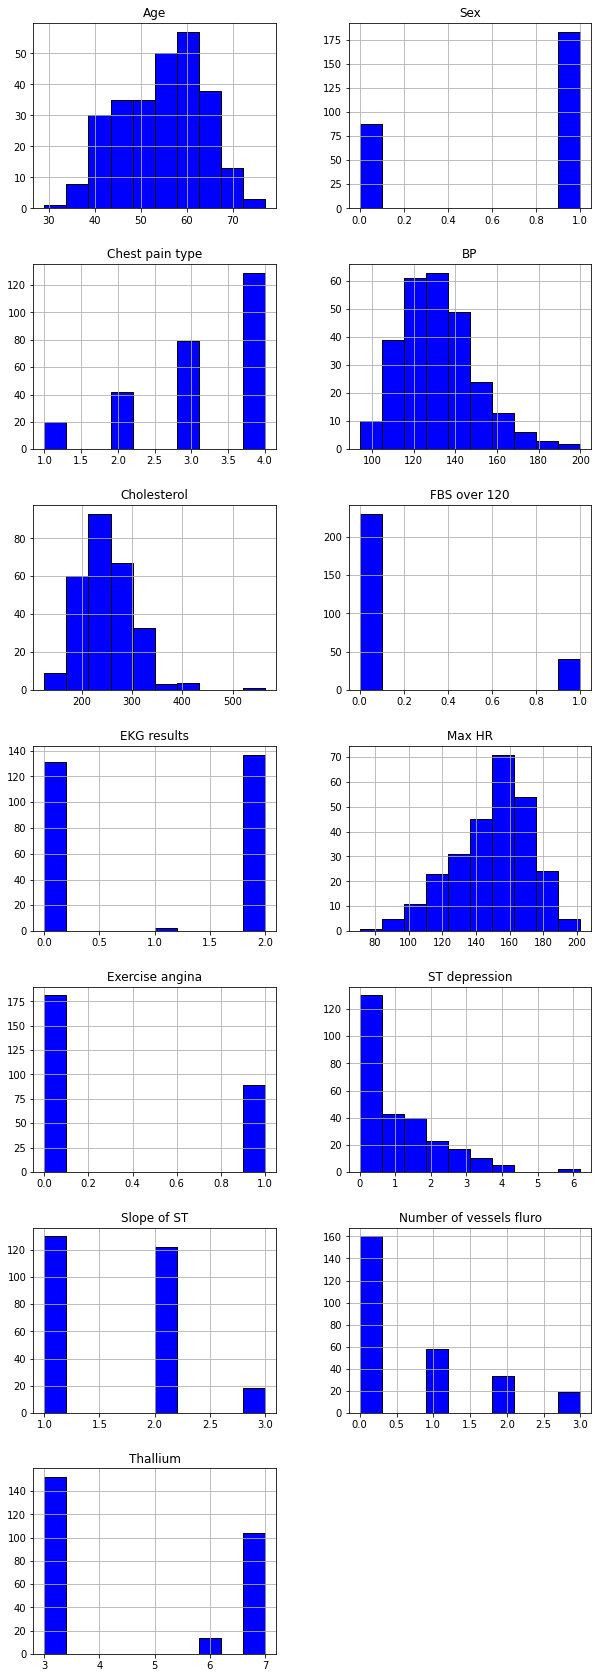

In [8]:
dataset.hist(edgecolor='black',layout = (7, 2),
            figsize = (10, 30),
            color=['blue'])

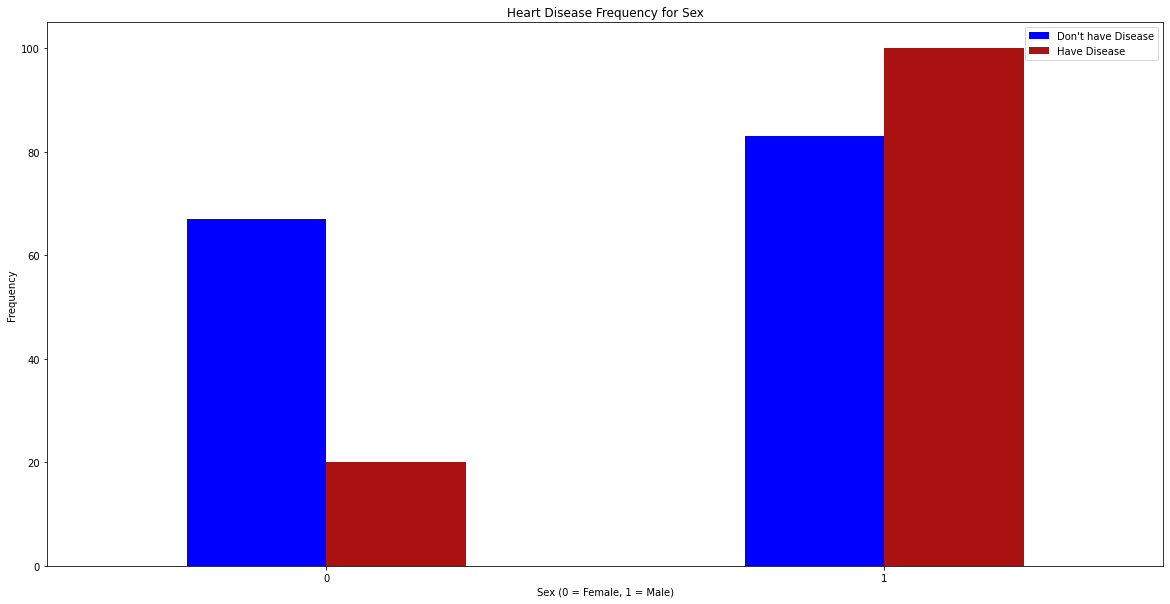

In [30]:
pd.crosstab(dataset['Sex'],dataset['Heart Disease']).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


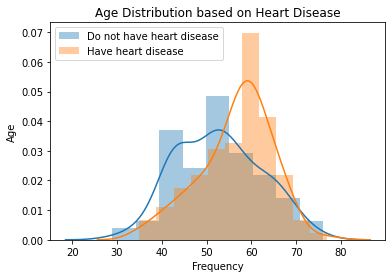

In [26]:
# Display age distribution based on heart disease
sns.distplot(dataset[dataset['Heart Disease'] == 'Absence']['Age'], label='Do not have heart disease')
sns.distplot(dataset[dataset['Heart Disease'] == 'Presence']['Age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

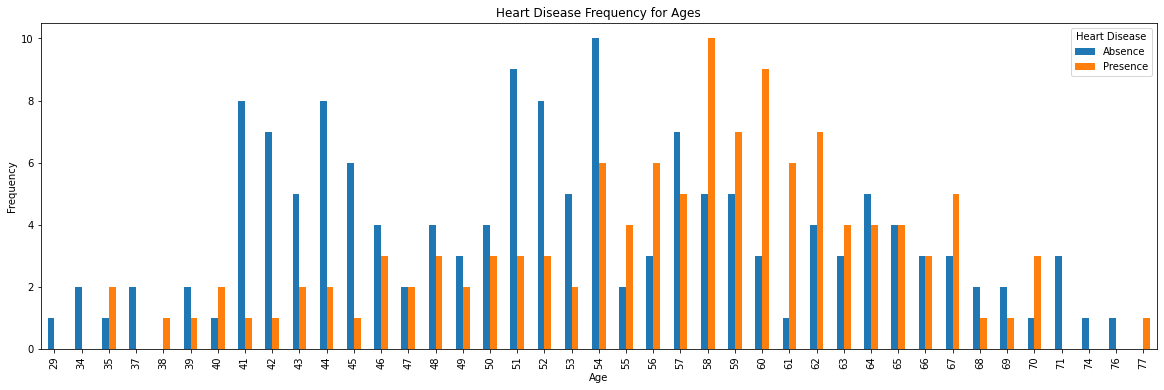

In [29]:
pd.crosstab(dataset['Age'],dataset['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


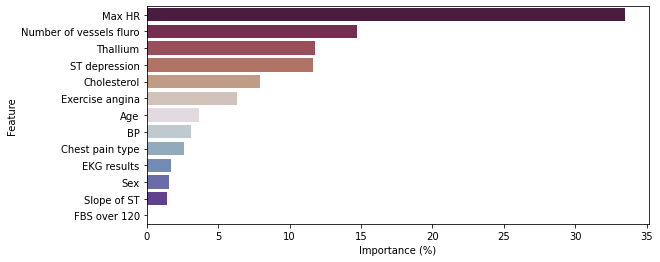

In [34]:
X = dataset.drop('Heart Disease',axis=1)
Y = dataset['Heart Disease']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
plt.savefig("FeatureImportance.png")

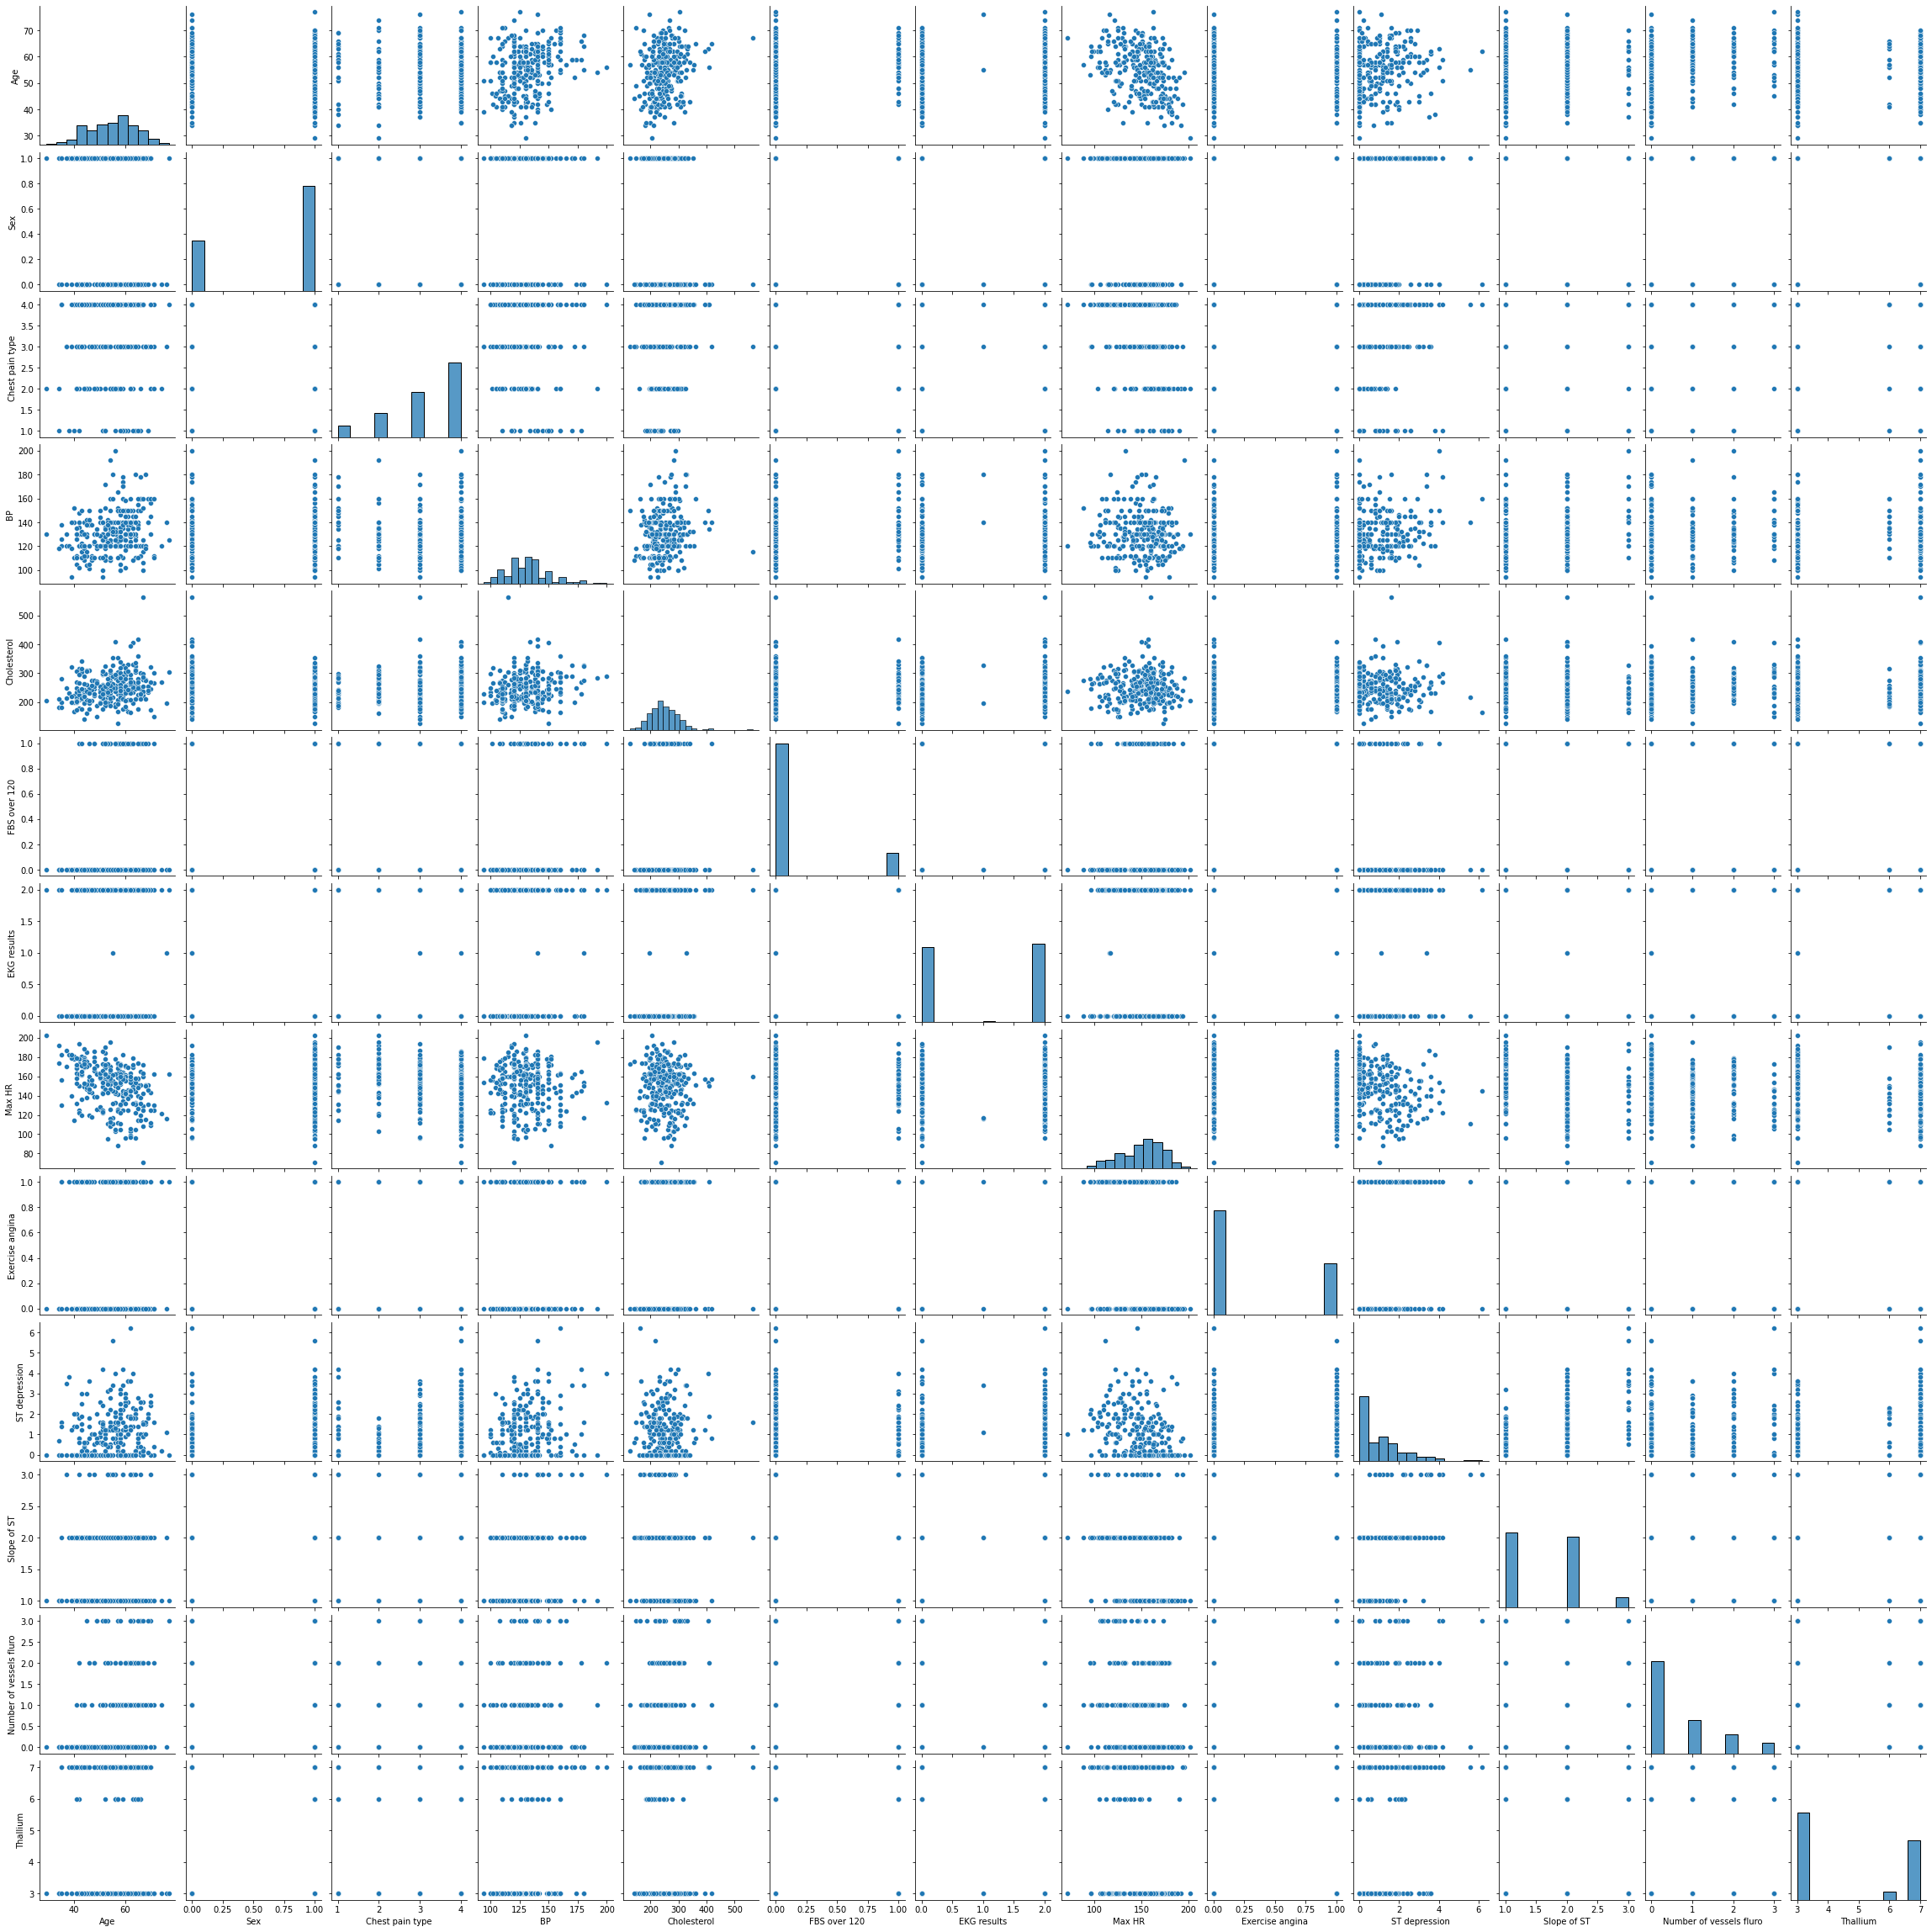

In [35]:
sns.pairplot(data=dataset)


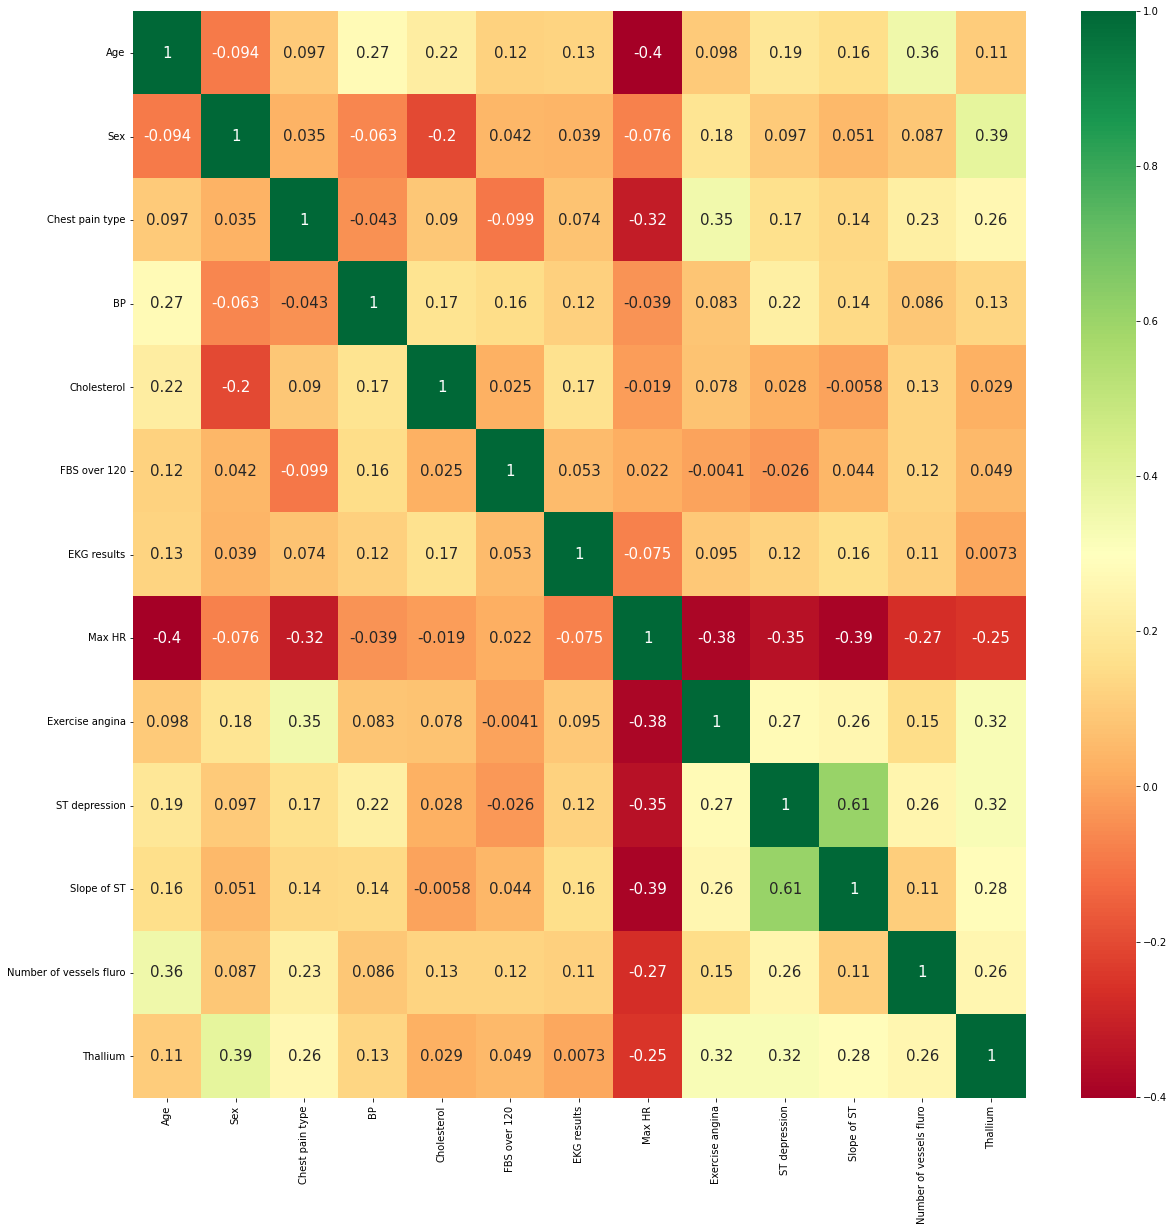

In [36]:
corr_matrix = dataset.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(dataset[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
